In [1]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())

# Get the data for this tickers from yahoo finance
data = yf.download(tickers.Symbol.to_list(),'2008-1-1','2021-7-12', auto_adjust=True)['Close']
print(data.head())

  Symbol             Security SEC filings             GICS Sector  \
0    MMM                   3M     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV               AbbVie     reports             Health Care   
3   ABMD              Abiomed     reports             Health Care   
4    ACN            Accenture     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates    Saint Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81

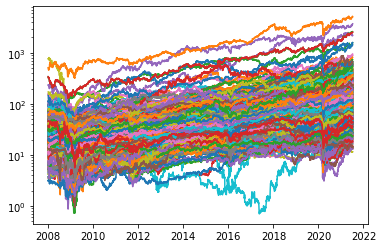

In [2]:
pyplot.plot(data)
pyplot.yscale('log')
pyplot.show()

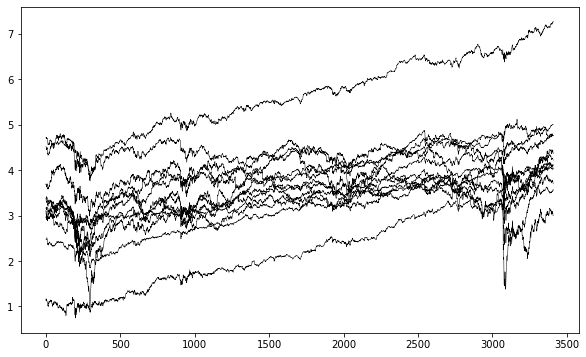

In [62]:
import numpy
pyplot.figure(figsize=(10,6))
np_data = data.to_numpy()
pyplot.plot(numpy.log(np_data[1:-1:,::40]), 'k', lw=.5)

pyplot.show()

In [46]:
numpy.log(np_data[2:,::20] / np_data[1:-1:,::20]).shape

(3409, 26)

In [4]:
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [63]:
pca = PCA()
X = numpy.log(np_data[2:,::20])
X = X[:,numpy.sum(numpy.isnan(X),axis=0) < 50]
X[numpy.isnan(X)] = 0
X = zscore(X)
X.shape

(3409, 21)

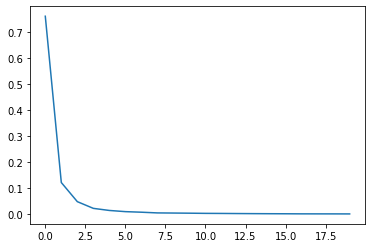

In [64]:
pca.fit(X[:,:20])
pyplot.plot(pca.explained_variance_ratio_)

In [50]:
X.shape

(3409, 21)

In [65]:
%load_ext autoreload
%autoreload 2
import numpy
from matplotlib import pyplot
import sys
sys.path.append('../../timeseries/')
sys.path.append('../../src/')
import factors
import observation_models
import state_models
from ssm_em import StateSpaceEM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
Dz = 4
Dx = X.shape[1]
sm = state_models.LinearStateModel(Dz)
om = observation_models.LinearObservationModel(Dx, Dz)
om.pca_init(X[:1000,:])

Iteration 2 - llk=17714.9
Iteration 4 - llk=18842.4
Iteration 6 - llk=19427.5
Iteration 8 - llk=19650.7
Iteration 10 - llk=19727.7
Iteration 12 - llk=19768.5
Iteration 14 - llk=19797.1
Iteration 16 - llk=19819.0
Iteration 18 - llk=19836.6
Iteration 20 - llk=19851.1
Iteration 22 - llk=19863.5
Iteration 24 - llk=19874.1
Iteration 26 - llk=19883.5
Iteration 28 - llk=19891.7
Iteration 30 - llk=19899.1
Iteration 32 - llk=19905.8
Iteration 34 - llk=19911.9
Iteration 36 - llk=19917.4
Iteration 38 - llk=19922.5
Iteration 40 - llk=19927.2
Iteration 42 - llk=19931.6
Iteration 44 - llk=19935.7
EM did converge.


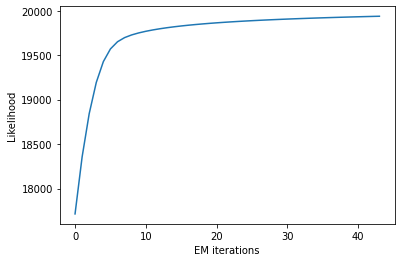

In [68]:
ssm_em_lin = StateSpaceEM(X[:1000,:], observation_model=om, state_model=sm, conv_crit=1e-4)
ssm_em_lin.run()
pyplot.plot(ssm_em_lin.llk_list[1:])
pyplot.xlabel('EM iterations')
pyplot.ylabel('Likelihood')
pyplot.show()

In [69]:
Du = 8
Dz = 4
sm = state_models.LinearStateModel(Dz)
# Here we change the observation model.
om = observation_models.HCCovObservationModel(Dx, Dz, Du)
om.pca_init(X[:1000,:])

In [ ]:
ssm_em = StateSpaceEM(X[:1000,:], observation_model=om, state_model=sm, conv_crit=1e-4)
ssm_em.run()
pyplot.plot(ssm_em.llk_list[1:])
pyplot.xlabel('EM iterations')
pyplot.ylabel('Likelihood')
pyplot.show()